<a href="https://colab.research.google.com/github/ravann/2022-TF-examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose

Build a model to predict the equation : y = 3x + 20

In [1]:
## Import dependencies

import numpy as np
import tensorflow as tf
import logging

## Sample values



In [2]:
x = np.array([5.0, 6.6, 22.12, 55.5, 87.6, 9, 202.8], dtype=float)

In [3]:
y = 3 * x + 20

In [4]:
y

array([ 35.  ,  39.8 ,  86.36, 186.5 , 282.8 ,  47.  , 628.4 ])

## Build the model

In [5]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([l0])

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

In [7]:
history = model.fit(x, y, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


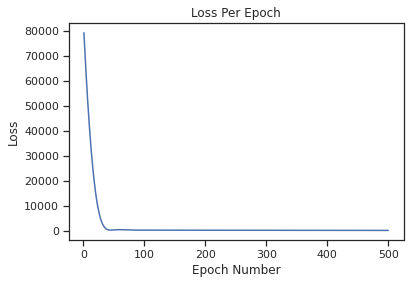

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

xaxs_val = np.arange(1, len(history.history['loss']) + 1)

axs = sns.lineplot(x = xaxs_val, y = history.history['loss'])
axs.set(xlabel='Epoch Number', ylabel='Loss', title = 'Loss Per Epoch')

plt.show()

## Predict some values and compare with the expected values

In [9]:
predict_x = np.array([1, 2, 3, 4, 5, 120, 150, 180], dtype=float)

In [10]:
expected = predict_x * 3 + 20
expected

array([ 23.,  26.,  29.,  32.,  35., 380., 470., 560.])

In [11]:
model.predict(predict_x)

array([[ 14.528703],
       [ 17.592451],
       [ 20.656199],
       [ 23.719946],
       [ 26.783693],
       [379.1147  ],
       [471.0271  ],
       [562.9395  ]], dtype=float32)

In [12]:
l0.get_weights()

[array([[3.0637476]], dtype=float32), array([11.464955], dtype=float32)]

### Observation

The model performs well at large numbers.  Is it because the model is not trained well at small numbers?

## Retrain the model with more snall numbers

In [13]:
new_features = np.array([1, 3, 2.5, 3.6, 4.8, 5.9, 6, 9, 11, 12.4, 13.56, 15.8, 22, 25, 28, 32, 45, 78, 200, 2345.78], dtype=float)
new_labels = new_features * 3 + 20

In [14]:
history = model.fit(new_features, new_labels, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


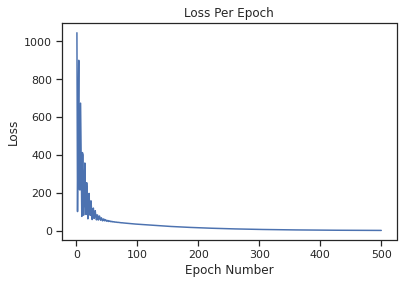

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

xaxs_val = np.arange(1, len(history.history['loss']) + 1)

axs = sns.lineplot(x = xaxs_val, y = history.history['loss'])
axs.set(xlabel='Epoch Number', ylabel='Loss', title = 'Loss Per Epoch')

plt.show()

In [16]:
predict_x = np.array([1, 2, 3, 4, 5, 120, 150, 180, 250, 6789, 12567], dtype=float)
expected = predict_x * 3 + 20
expected

array([2.3000e+01, 2.6000e+01, 2.9000e+01, 3.2000e+01, 3.5000e+01,
       3.8000e+02, 4.7000e+02, 5.6000e+02, 7.7000e+02, 2.0387e+04,
       3.7721e+04])

In [17]:
model.predict(predict_x)

array([[2.2100908e+01],
       [2.5101374e+01],
       [2.8101837e+01],
       [3.1102303e+01],
       [3.4102768e+01],
       [3.7915613e+02],
       [4.6917007e+02],
       [5.5918402e+02],
       [7.6921649e+02],
       [2.0389252e+04],
       [3.7725934e+04]], dtype=float32)

## Explore the model values

In [18]:
l0.get_weights()

[array([[3.0004642]], dtype=float32), array([19.100445], dtype=float32)]

## Train a new model with more layers

In [19]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
l1 = tf.keras.layers.Dense(units=1)
l2 = tf.keras.layers.Dense(units=1)
model2 = tf.keras.Sequential([l0, l1, l2])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model2.fit(new_features, new_labels, epochs=500, verbose=False)
print("Finished training the model")
print("These are the l0 variables: {}".format(l0.get_weights()))
print("These are the l1 variables: {}".format(l1.get_weights()))
print("These are the l2 variables: {}".format(l2.get_weights()))

Finished training the model
These are the l0 variables: [array([[-1.4484289]], dtype=float32), array([-4.2845483], dtype=float32)]
These are the l1 variables: [array([[-1.4824716]], dtype=float32), array([4.5189667], dtype=float32)]
These are the l2 variables: [array([[1.3972198]], dtype=float32), array([4.454925], dtype=float32)]


In [20]:
predict_x

array([1.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00,
       1.2000e+02, 1.5000e+02, 1.8000e+02, 2.5000e+02, 6.7890e+03,
       1.2567e+04])

In [21]:
expected

array([2.3000e+01, 2.6000e+01, 2.9000e+01, 3.2000e+01, 3.5000e+01,
       3.8000e+02, 4.7000e+02, 5.6000e+02, 7.7000e+02, 2.0387e+04,
       3.7721e+04])

In [22]:
model2.predict(predict_x)

array([[2.2643852e+01],
       [2.5644039e+01],
       [2.8644226e+01],
       [3.1644413e+01],
       [3.4644600e+01],
       [3.7966608e+02],
       [4.6967163e+02],
       [5.5967725e+02],
       [7.6969025e+02],
       [2.0387910e+04],
       [3.7722992e+04]], dtype=float32)

In [23]:
history.history['loss'][490:]

[0.15171316266059875,
 0.14792320132255554,
 0.1442277729511261,
 0.14060573279857635,
 0.13708606362342834,
 0.13363716006278992,
 0.1302712857723236,
 0.12698784470558167,
 0.1237819567322731,
 0.12065622955560684]

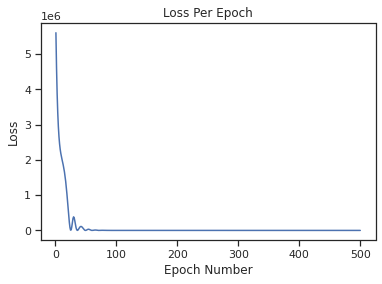

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

xaxs_val = np.arange(1, len(history.history['loss']) + 1)

axs = sns.lineplot(x = xaxs_val, y = history.history['loss'])
axs.set(xlabel='Epoch Number', ylabel='Loss', title = 'Loss Per Epoch')

plt.show()

## Plot expected vs. predictions in various models

In [25]:
import pandas as pd

### Prepare the data for model1 predictions

In [32]:
xval = np.arange(1, 101, dtype=float)

In [33]:
predict_y = model.predict(xval)
yval = []
for py in predict_y:
  yval.append(py[0])

In [34]:
df = pd.DataFrame({'xval' : xval, 'yval' : yval})
df['model'] = 'model1'

### Prepare the data for model2 predictions

In [35]:
predict_y = model2.predict(xval)
yval = []
for py in predict_y:
  yval.append(py[0])

In [36]:
df2 = pd.DataFrame({'xval' : xval, 'yval' : yval})
df2['model'] = 'model2'

In [38]:
df = df.append(df2)

In [50]:
df['expected'] = df['xval'] * 3 + 20

### Plot the data

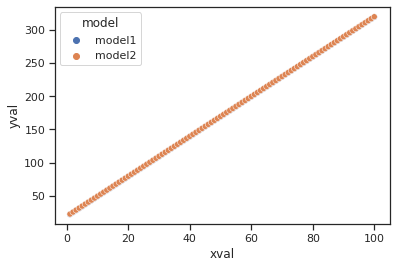

In [51]:
sns.scatterplot(data=df, x = "xval", y = "yval", hue='model')

The above graph 

In [52]:
plt_df = df[df['xval'] < 10]

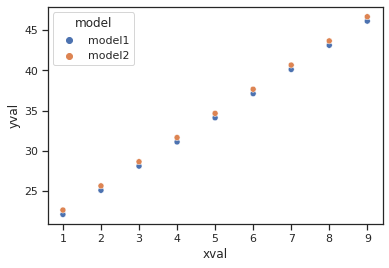

In [53]:
sns.scatterplot(data=plt_df, x = "xval", y = "yval", hue='model')

### The values are so close, lets plot the diff

In [55]:
df['diff'] = df['expected'] - df['yval']

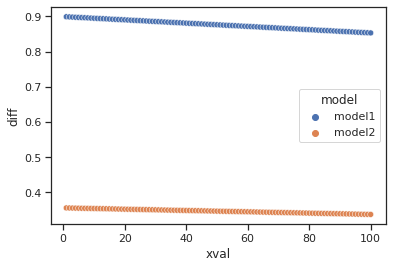

In [57]:
sns.scatterplot(data=df, x = "xval", y = "diff", hue='model')